In [1]:
import pandas as pd

df = pd.read_csv('works_for_model_not_area.csv')

In [2]:
df.columns

Index(['Unnamed: 0', 'season', 'field', 'work_type', 'work_subtype',
       'start_date', 'end_date', 'completed_work_area', 'main_tech',
       'add_tech', 'mech', 'proc_depth', 'prod_purpose', 'prod_weight',
       'prod_dry_perc', 'prod_humid', 'prod_impur', 'work_id', 'work_yield',
       'region', 'land_type', 'fertility_score', 'crop', 'crop_predecessor',
       'crop_yearold', 'field_area', 'hybrid', 'reproduction', 'seed_origin',
       'technology', 'yield_plan', 'p2o5', 'k2o', 'humus', 'ph', 'work_number',
       'unique_works_before', 'works_before', 'metric', 'cumsum_subwork_area',
       'total_subwork_area', 'total_area_for_mech', 'cumsum_area',
       'Metric_Area', 'field_yield', 'std', 'mean', 'yield_z'],
      dtype='object')

In [3]:
import pandas as pd

# Пример данных (замените на ваш DataFrame)

# Функция для Target Encoding
def target_encode(data, categorical_cols, target_col):
    for col in categorical_cols:
        # Вычисляем среднее значение целевой переменной для каждой категории
        category_means = data.groupby(col)[target_col].transform('mean')
        # Добавляем новый столбец с закодированными значениями
        data[f'{col}_encoded'] = category_means
    return data

# Применение Target Encoding
categorical_cols = ['crop', 'crop_predecessor', 'work_type', 'work_subtype']
target_col = 'field_yield'
data_encoded = target_encode(df, categorical_cols, target_col)

data_encoded = data_encoded.drop(columns=categorical_cols)

df = data_encoded

In [4]:
df.head()

,Unnamed: 0,season,field,start_date,end_date,completed_work_area,main_tech,add_tech,mech,proc_depth,...,cumsum_area,Metric_Area,field_yield,std,mean,yield_z,crop_encoded,crop_predecessor_encoded,work_type_encoded,work_subtype_encoded
0,0,2024,46.22.03.005.00,YYYY-00-DD 00:00:SS,YYYY-00-DD 00:00:SS,8.40,Арендованная техника,Арендованная техника,Admin MS SQL,NaN,...,8.40,1.000000,1.445000,0.457588,1.465660,-0.045149,1.468524,1.705962,3.225989,2.492026
1,1,2023,02.09.09.011.00,YYYY-00-DD 00:00:SS,NaN,46.09,"Трактор колесный Ростсельмаш 2400, зав.ном. R0...","Борона зубовая Veles АГС-22-2У.М, зав.ном. 785",Абдулов Руслан Флюрович,NaN,...,46.09,1.000000,2.291853,1.157808,2.980334,-0.594642,3.020691,1.830622,3.327818,3.267260
2,2,2023,02.09.08.016.00,YYYY-00-DD 00:00:SS,NaN,30.91,"Трактор колесный Ростсельмаш 2400, зав.ном. R0...","Борона зубовая Veles АГС-22-2У.М, зав.ном. 775",Абдулов Руслан Флюрович,10.0,...,168.10,1.000000,2.448075,1.157808,2.980334,-0.459713,3.020691,1.830622,3.327818,3.267260
3,3,2023,02.09.08.006.00,YYYY-00-DD 00:00:SS,NaN,20.00,"Трактор колесный Ростсельмаш 2400, зав.ном. R0...","Борона зубовая Veles АГС-22-2У.М, зав.ном. 775",Абдулов Руслан Флюрович,10.0,...,188.10,1.000000,2.164106,1.157808,2.980334,-0.704977,3.020691,1.830622,3.327818,3.267260
4,4,2023,02.12.11.004.00,YYYY-00-DD 00:00:SS,NaN,82.08,"Трактор колесный Ростсельмаш 2400, зав.ном. R0...","Культиватор предпосевной John Deere 2210, зав....",Абдулов Руслан Флюрович,10.0,...,270.18,0.303797,0.549376,0.181181,0.504973,0.245079,0.492472,2.819858,3.327818,4.148613


In [5]:
df.shape

(6589, 48)

In [6]:
# import pandas as pd
# import numpy as np
# from sklearn.ensemble import RandomForestRegressor  # Для регрессии
# from sklearn.ensemble import RandomForestClassifier  # Для классификации
# from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt

# X = df.drop(columns=['yield_z', 'field_yield', 'mean', 'std', 
#                      'work_yield', 'Unnamed: 0', 'completed_work_area',
#                      'total_area_for_mech', 'cumsum_area', 'works_before',
#                      'cumsum_subwork_area', 'total_subwork_area', 'work_number'
#                     ]).select_dtypes(include=['number'])
# y = df['yield_z']

# # Разделяем данные на обучающую и тестовую выборки
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Создаем модель случайного леса (регрессия)
# model = RandomForestRegressor(n_estimators=100, random_state=42)

# # Обучаем модель
# model.fit(X_train, y_train)

# # Получаем важность признаков
# feature_importances = model.feature_importances_

# # Создаем DataFrame для отображения важности признаков
# importance_df = pd.DataFrame({
#     'Feature': X.columns,
#     'Importance': feature_importances
# })

# # Сортируем по убыванию важности
# importance_df = importance_df.sort_values(by='Importance', ascending=False)

# # Выводим важность признаков
# print(importance_df)

# # Строим график важности признаков
# plt.figure(figsize=(10, 6))
# plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
# plt.xlabel('Важность признака')
# plt.ylabel('Признак')
# plt.title('Важность признаков (Random Forest)')
# plt.gca().invert_yaxis()  # Отображаем признаки сверху вниз
# plt.show()

In [7]:
df.columns

Index(['Unnamed: 0', 'season', 'field', 'start_date', 'end_date',
       'completed_work_area', 'main_tech', 'add_tech', 'mech', 'proc_depth',
       'prod_purpose', 'prod_weight', 'prod_dry_perc', 'prod_humid',
       'prod_impur', 'work_id', 'work_yield', 'region', 'land_type',
       'fertility_score', 'crop_yearold', 'field_area', 'hybrid',
       'reproduction', 'seed_origin', 'technology', 'yield_plan', 'p2o5',
       'k2o', 'humus', 'ph', 'work_number', 'unique_works_before',
       'works_before', 'metric', 'cumsum_subwork_area', 'total_subwork_area',
       'total_area_for_mech', 'cumsum_area', 'Metric_Area', 'field_yield',
       'std', 'mean', 'yield_z', 'crop_encoded', 'crop_predecessor_encoded',
       'work_type_encoded', 'work_subtype_encoded'],
      dtype='object')

In [8]:
df = df.drop(columns=['Unnamed: 0', 'start_date', 
                      'end_date', 'field_yield', 'std', 'mean', 
                      'work_number', 'unique_works_before', 'works_before', 'cumsum_subwork_area',
                      'work_id', 'field', 'total_subwork_area', 'total_area_for_mech', 'cumsum_area',
                      'prod_purpose', 'prod_weight', 'prod_dry_perc',
                      'prod_humid', 'prod_impur', 'mech', 
                      # 'crop_yearold',
                      'hybrid',
                      'main_tech', 'add_tech', 'field_area', 'work_yield'])

In [9]:
df.head()

,season,completed_work_area,proc_depth,region,land_type,fertility_score,crop_yearold,reproduction,seed_origin,technology,...,k2o,humus,ph,metric,Metric_Area,yield_z,crop_encoded,crop_predecessor_encoded,work_type_encoded,work_subtype_encoded
0,2024,8.40,NaN,Курск,пашня,3.0,NaN,СЭ,Свои,классическая с плугом,...,NaN,NaN,NaN,1.0,1.000000,-0.045149,1.468524,1.705962,3.225989,2.492026
1,2023,46.09,NaN,Башкирия,пашня,4.0,NaN,РС-2,Свои,классическая с плугом,...,NaN,NaN,NaN,1.0,1.000000,-0.594642,3.020691,1.830622,3.327818,3.267260
2,2023,30.91,10.0,Башкирия,пашня,4.0,NaN,РС-2,Свои,классическая с плугом,...,NaN,NaN,NaN,1.0,1.000000,-0.459713,3.020691,1.830622,3.327818,3.267260
3,2023,20.00,10.0,Башкирия,пашня,4.0,NaN,РС-2,Свои,классическая с плугом,...,NaN,NaN,NaN,1.0,1.000000,-0.704977,3.020691,1.830622,3.327818,3.267260
4,2023,82.08,10.0,Башкирия,пашня,NaN,NaN,ЭС,Покупные,классическая с плугом,...,NaN,NaN,NaN,0.2,0.303797,0.245079,0.492472,2.819858,3.327818,4.148613


In [10]:
df = pd.get_dummies(df, columns=['region'], prefix='region')
df = pd.get_dummies(df, columns=['seed_origin'], prefix='seed_origin')
df = pd.get_dummies(df, columns=['reproduction'], prefix='reproduction')
df = pd.get_dummies(df, columns=['technology'], prefix='technology')
df = pd.get_dummies(df, columns=['land_type'], prefix='land_type')

In [11]:
df = df.fillna(df.mean())

In [12]:
df

,season,completed_work_area,proc_depth,fertility_score,crop_yearold,yield_plan,p2o5,k2o,humus,ph,...,reproduction_РСт,reproduction_СЭ,reproduction_Смесь репродукций,reproduction_ЭС,technology_гибридизация,technology_классическая с плугом,technology_минимальная,technology_нулевая с прямым посевом,land_type_луг,land_type_пашня
0,2024,8.40,11.849606,3.00000,2.805213,2.50,121.693173,128.296589,4.707615,5.589193,...,False,True,False,False,False,True,False,False,False,True
1,2023,46.09,11.849606,4.00000,2.805213,3.50,121.693173,128.296589,4.707615,5.589193,...,False,False,False,False,False,True,False,False,False,True
2,2023,30.91,10.000000,4.00000,2.805213,3.50,121.693173,128.296589,4.707615,5.589193,...,False,False,False,False,False,True,False,False,False,True
3,2023,20.00,10.000000,4.00000,2.805213,3.50,121.693173,128.296589,4.707615,5.589193,...,False,False,False,False,False,True,False,False,False,True
4,2023,82.08,10.000000,3.38093,2.805213,1.20,121.693173,128.296589,4.707615,5.589193,...,False,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6584,2023,22.17,11.849606,3.00000,2.805213,5.90,100.000000,193.000000,3.300000,4.900000,...,False,False,False,False,False,False,False,False,False,True
6585,2023,8.42,11.849606,3.00000,2.000000,4.42,121.693173,128.296589,4.707615,5.589193,...,True,False,False,False,False,True,False,False,False,True
6586,2023,14.65,11.849606,3.00000,2.000000,4.42,121.693173,128.296589,4.707615,5.589193,...,True,False,False,False,False,True,False,False,False,True
6587,2023,15.31,11.849606,3.00000,5.000000,4.42,121.693173,128.296589,4.707615,5.589193,...,True,False,False,False,False,True,False,False,False,True


In [13]:
df.isna().sum()

season                                 0
completed_work_area                    0
proc_depth                             0
fertility_score                        0
crop_yearold                           0
yield_plan                             0
p2o5                                   0
k2o                                    0
humus                                  0
ph                                     0
metric                                 0
Metric_Area                            0
yield_z                                0
crop_encoded                           0
crop_predecessor_encoded               0
work_type_encoded                      0
work_subtype_encoded                   0
region_Алтай                           0
region_Башкирия                        0
region_Воронеж                         0
region_Калуга                          0
region_Курск                           0
region_Москва                          0
region_Новосибирск                     0
region_Оренбург 

In [14]:
df.columns

Index(['season', 'completed_work_area', 'proc_depth', 'fertility_score',
       'crop_yearold', 'yield_plan', 'p2o5', 'k2o', 'humus', 'ph', 'metric',
       'Metric_Area', 'yield_z', 'crop_encoded', 'crop_predecessor_encoded',
       'work_type_encoded', 'work_subtype_encoded', 'region_Алтай',
       'region_Башкирия', 'region_Воронеж', 'region_Калуга', 'region_Курск',
       'region_Москва', 'region_Новосибирск', 'region_Оренбург',
       'region_Рязань', 'region_СПб', 'region_Самара', 'region_Татарстан',
       'region_Тюмень', 'seed_origin_Покупные', 'seed_origin_Свои',
       'seed_origin_Свои + покупные', 'reproduction_F1',
       'reproduction_Без репродукции', 'reproduction_ОС', 'reproduction_ПР-1',
       'reproduction_ПР-2', 'reproduction_РС-1', 'reproduction_РС-2',
       'reproduction_РС-3', 'reproduction_РСт', 'reproduction_СЭ',
       'reproduction_Смесь репродукций', 'reproduction_ЭС',
       'technology_гибридизация', 'technology_классическая с плугом',
       'technolog

In [15]:
df.head(1)

,season,completed_work_area,proc_depth,fertility_score,crop_yearold,yield_plan,p2o5,k2o,humus,ph,...,reproduction_РСт,reproduction_СЭ,reproduction_Смесь репродукций,reproduction_ЭС,technology_гибридизация,technology_классическая с плугом,technology_минимальная,technology_нулевая с прямым посевом,land_type_луг,land_type_пашня
0,2024,8.4,11.849606,3.0,2.805213,2.5,121.693173,128.296589,4.707615,5.589193,...,False,True,False,False,False,True,False,False,False,True


In [16]:
print("Пропущенные значения в yield_z:", df['yield_z'].isnull().sum())
print("Пропущенные значения в Metric_Area:", df['Metric_Area'].isnull().sum())
print("Уникальные значения в Metric_Area:", df['Metric_Area'].nunique())

Пропущенные значения в yield_z: 0
Пропущенные значения в Metric_Area: 0
Уникальные значения в Metric_Area: 5837


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6589 entries, 0 to 6588
Data columns (total 51 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   season                               6589 non-null   int64  
 1   completed_work_area                  6589 non-null   float64
 2   proc_depth                           6589 non-null   float64
 3   fertility_score                      6589 non-null   float64
 4   crop_yearold                         6589 non-null   float64
 5   yield_plan                           6589 non-null   float64
 6   p2o5                                 6589 non-null   float64
 7   k2o                                  6589 non-null   float64
 8   humus                                6589 non-null   float64
 9   ph                                   6589 non-null   float64
 10  metric                               6589 non-null   float64
 11  Metric_Area                   

In [18]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# df['same'] = df['crop_encoded'] != df['crop_predecessor_encoded']

numeric_columns = df.select_dtypes(include=['number']).columns

df['Metric_Area_binned'] = pd.cut(df['Metric_Area'], bins=500, labels=False)  
df['Metric_Area_binned_mean'] = df.groupby('Metric_Area_binned')['Metric_Area'].transform('mean') 

# scaler = StandardScaler()
# df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Преобразуем все столбцы с типом bool в int
bool_columns = df.select_dtypes(include=['bool']).columns
df[bool_columns] = df[bool_columns].astype(int)
df['const'] = 1
X = df.drop(columns=['yield_z', 'metric', 'Metric_Area_binned', 'Metric_Area_binned_mean', 'completed_work_area',
                    'crop_encoded', 'crop_predecessor_encoded'])
y = df['yield_z']
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                yield_z   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     26.48
Date:                Tue, 17 Dec 2024   Prob (F-statistic):          1.11e-196
Time:                        09:15:46   Log-Likelihood:                -8969.4
No. Observations:                6589   AIC:                         1.803e+04
Df Residuals:                    6544   BIC:                         1.833e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
se

fertility_score      -0.0071      0.016     -0.432      0.666      -0.039       0.025
crop_yearold         -0.0386      0.018     -2.115      0.034      -0.074      -0.003
yield_plan            0.0158      0.018      0.897      0.370      -0.019       0.050
p2o5                  0.0765      0.023      3.278      0.001       0.031       0.122
k2o                  -0.0399      0.026     -1.522      0.128      -0.091       0.012
humus                 0.0455      0.035      1.308      0.191      -0.023       0.114
ph            

season                                 -0.1884      0.012    -15.419      0.000      -0.212      -0.164
completed_work_area                    -0.0073      0.012     -0.605      0.545      -0.031       0.016
yield_plan                              0.1941      0.047      4.104      0.000       0.101       0.287
p2o5                                    0.0551      0.014      3.850      0.000       0.027       0.083
k2o                                    -0.0010      0.015     -0.066      0.947      -0.031       0.029
humus                                   0.0834      0.018      4.564      0.000       0.048       0.119
ph                                     -0.0789      0.014     -5.474      0.000      -0.107      -0.051

0.007462185772383334


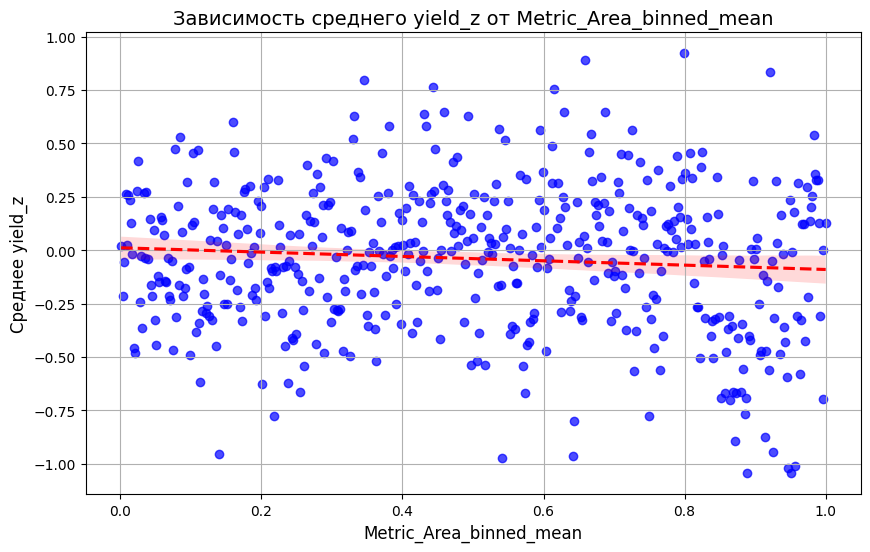

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import numpy as np

df['Metric_Area_binned'] = pd.cut(df['Metric_Area'], bins=500, labels=False)  
df['Metric_Area_binned_mean'] = df.groupby('Metric_Area_binned')['Metric_Area'].transform('mean') 

# Вычисляем среднее значение yield_z для каждого бина Metric_Area_binned_mean
bin_means = df.groupby('Metric_Area_binned_mean')['yield_z'].mean().reset_index()

# График с использованием sns.regplot
x = bin_means['Metric_Area_binned_mean']
y = bin_means['yield_z']

coefficients = np.polyfit(x, y, 1)
p = np.poly1d(coefficients)
y_pred = p(x)  # Предсказанные значения
r_squared = r2_score(y, y_pred)
print(r_squared)

plt.figure(figsize=(10, 6))
sns.regplot(
    x=x,  # Ось X: Metric_Area_binned_mean
    y=y,                 # Ось Y: Среднее yield_z
    scatter_kws={'color': 'blue', 'alpha': 0.7},  # Настройки точек
    line_kws={'color': 'red', 'linestyle': '--'}  # Настройки линии регрессии
)

plt.title('Зависимость среднего yield_z от Metric_Area_binned_mean', fontsize=14)
plt.xlabel('Metric_Area_binned_mean', fontsize=12)
plt.ylabel('Среднее yield_z', fontsize=12)
plt.grid(True)
plt.show()

In [20]:
model = sm.OLS(y, x).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                yield_z   R-squared (uncentered):                   0.021
Model:                            OLS   Adj. R-squared (uncentered):              0.019
Method:                 Least Squares   F-statistic:                              10.43
Date:                Tue, 17 Dec 2024   Prob (F-statistic):                     0.00132
Time:                        09:15:46   Log-Likelihood:                         -167.52
No. Observations:                 499   AIC:                                      337.0
Df Residuals:                     498   BIC:                                      341.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

R-squared (квадратичная регрессия): 0.034460616379199505


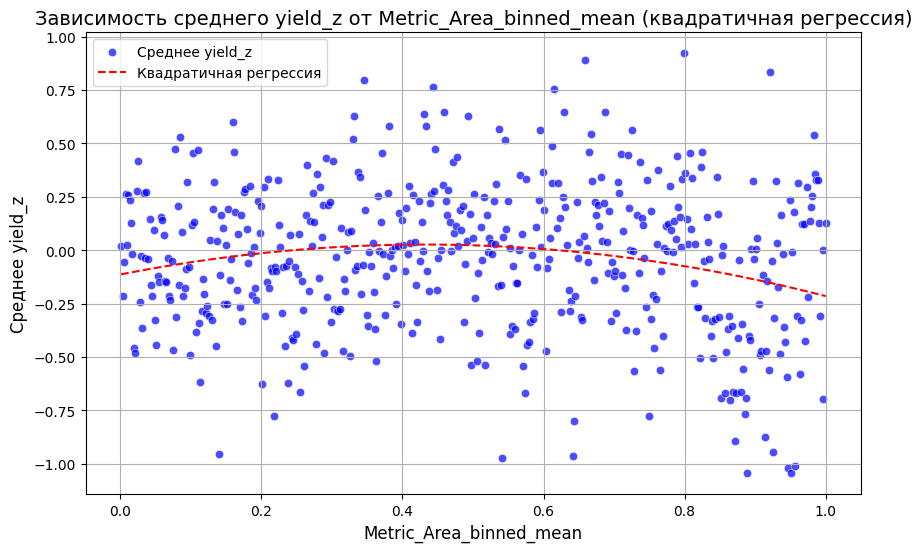

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import numpy as np

# Вычисляем среднее значение yield_z для каждого бина Metric_Area_binned_mean
bin_means = df.groupby('Metric_Area_binned_mean')['yield_z'].mean().reset_index()

# Данные для регрессии
x = bin_means['Metric_Area_binned_mean']
y = bin_means['yield_z']

# Вычисление коэффициентов квадратичной регрессии
coefficients = np.polyfit(x, y, 2)  # 2 - порядок полинома (квадратичная регрессия)
p = np.poly1d(coefficients)  # Создание полиномиальной функции
y_pred = p(x)  # Предсказанные значения
r_squared = r2_score(y, y_pred)  # Вычисление R^2
print(f"R-squared (квадратичная регрессия): {r_squared}")

# Визуализация
plt.figure(figsize=(10, 6))

# Точечный график с использованием sns.scatterplot
sns.scatterplot(
    x=x,  # Ось X: Metric_Area_binned_mean
    y=y,  # Ось Y: Среднее yield_z
    color='blue',
    alpha=0.7,
    label='Среднее yield_z'
)

# Линия квадратичной регрессии
plt.plot(x, y_pred, color='red', linestyle='--', label='Квадратичная регрессия')

# Настройка графика
plt.title('Зависимость среднего yield_z от Metric_Area_binned_mean (квадратичная регрессия)', fontsize=14)
plt.xlabel('Metric_Area_binned_mean', fontsize=12)
plt.ylabel('Среднее yield_z', fontsize=12)
plt.legend()
plt.grid(True)
plt.savefig('square_reg.svg')
plt.show()

In [22]:
import numpy as np

# Вычисление коэффициентов квадратичной регрессии
coefficients = np.polyfit(x, y, 2)  # 2 - порядок полинома (квадратичная регрессия)
a, b, c = coefficients  # Коэффициенты a, b, c

# Вычисление координат вершины параболы
x_v = -b / (2 * a)  # x-координата вершины
y_v = a * x_v**2 + b * x_v + c  # y-координата вершины

print(f"Вершина параболы: x_v = {x_v}, y_v = {y_v}")

Вершина параболы: x_v = 0.43247135728003416, y_v = 0.026303976685465927
